<a href="https://colab.research.google.com/github/RiceMIX/Fashin-mnits/blob/main/9_upload_your_photo_fashinmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  tensorflow.keras.utils import to_categorical
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense
from  tensorflow.keras.datasets import fashion_mnist
import  tensorflow as tf


from google.colab import files

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
classes = ['футболка','брюки', 'свитер','платє','palto', 'tufli', 'rubashka', 'krosovki', 'sumka', 'botinki']

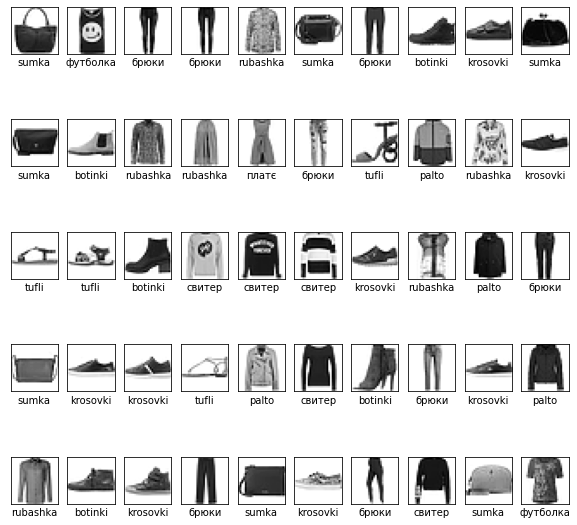

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
  plt.subplot(5,10, i-100+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i]])

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

x_train = x_train/255
x_test = x_test/255

In [6]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
model = Sequential([
    Dense(800, input_dim=784, activation="relu"),
    Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [9]:
opt = tf.optimizers.Adam(learning_rate=0.001)

In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [21]:
history_train = model.fit(x_train,y_train, batch_size=200, epochs=100, validation_split=0.2)

Epoch 1/100
240/240 [==============================] - 5s 23ms/step - loss: 0.3697 - accuracy: 0.8678 - val_loss: 0.3705 - val_accuracy: 0.8671
Epoch 2/100
240/240 [==============================] - 6s 26ms/step - loss: 0.3332 - accuracy: 0.8806 - val_loss: 0.3389 - val_accuracy: 0.8772
Epoch 3/100
240/240 [==============================] - 7s 28ms/step - loss: 0.3058 - accuracy: 0.8873 - val_loss: 0.3214 - val_accuracy: 0.8823
Epoch 4/100
240/240 [==============================] - 6s 24ms/step - loss: 0.2886 - accuracy: 0.8929 - val_loss: 0.3278 - val_accuracy: 0.8792
Epoch 5/100
240/240 [==============================] - 5s 20ms/step - loss: 0.2734 - accuracy: 0.9008 - val_loss: 0.3334 - val_accuracy: 0.8821
Epoch 6/100
240/240 [==============================] - 6s 27ms/step - loss: 0.2601 - accuracy: 0.9031 - val_loss: 0.3119 - val_accuracy: 0.8900
Epoch 7/100
240/240 [==============================] - 5s 22ms/step - loss: 0.2489 - accuracy: 0.9087 - val_loss: 0.3220 - val_accuracy:

In [11]:
scores_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 2.4373 - accuracy: 0.0485


In [12]:
x = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [13]:
xx = np.argmax(x[1000])
yy = np.argmax(x[1000])

print(classes[xx], classes[yy])

брюки брюки


In [14]:
model.save('fashion_mnist_forLAST.h5')

# ***NEXT IN NEXT 9_1***